In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
import analyze as a
import matplotlib.pyplot as plt
import numpy as np

In [3]:
f, t_mini_gp, l = a.get_ftl(0, "sweep", "51.0", ground_plane=True, simulation="mini_MIST")
t_large = a.get_ftl(0, "sweep", "51.0", ground_plane=False, simulation="old_MIST", return_fl=False)
t_small = a.get_ftl(0, "sweep", "51.0", ground_plane=False, simulation="new_MIST", return_fl=False)

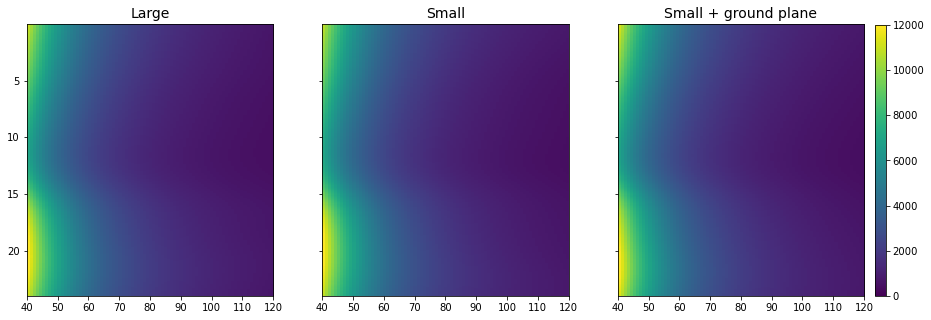

In [4]:
antenna = ["Large", "Small", "Small + ground plane"]
temps = [t_large, t_small, t_mini_gp]
fig, axs = plt.subplots(figsize=(15,5), ncols=3, sharex=True, sharey=True)
for i, temp in enumerate(temps):
    ax = axs[i]
    im = ax.imshow(temp, extent=[f.min(), f.max(), l.max(), l.min()], interpolation="none", aspect="auto")
    im.set_clim(0, 12000)
    ax.set_title(antenna[i])
cax = fig.add_axes([.91, 0.125, 0.01, .7525])
cbar = fig.colorbar(im, cax=cax)

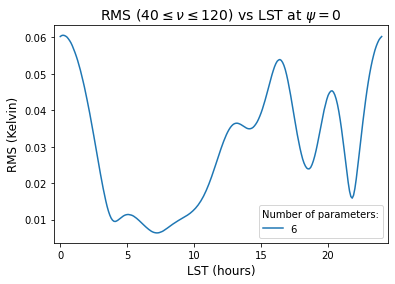

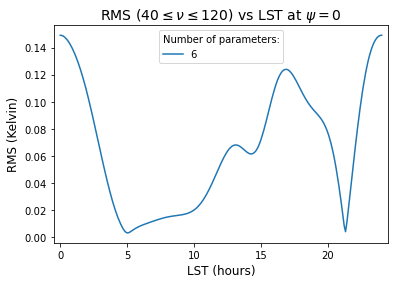

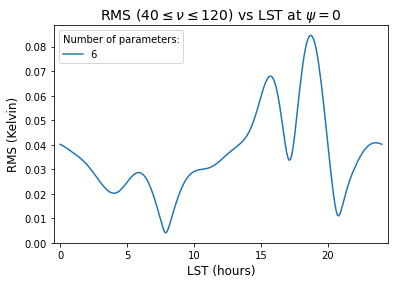

In [17]:
a.plot_rms(0, f, t_large, l, Nfg_array=[6], Nfg_split=0, save=False, loc="sweep", sweep_lat=51.0, ground_plane=False,
          simulation="old_MIST", model_type="EDGES_polynomial")

a.plot_rms(0, f, t_small, l, Nfg_array=[6], Nfg_split=0, save=False, loc="sweep", sweep_lat=51.0, ground_plane=False,
          simulation="new_MIST", model_type="EDGES_polynomial")

a.plot_rms(0, f, t_mini_gp, l, Nfg_array=[6], Nfg_split=0, save=False, loc="sweep", sweep_lat=51.0, ground_plane=True,
          simulation="mini_MIST", model_type="EDGES_polynomial")

In [18]:
rms_bin_large = a.plot2D_LSTbins(f, t_large, l)
rms_bin_small = a.plot2D_LSTbins(f, t_small, l)
rms_bin_small_gp = a.plot2D_LSTbins(f, t_mini_gp, l)

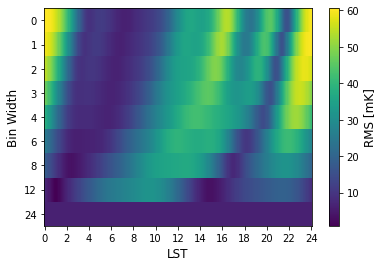

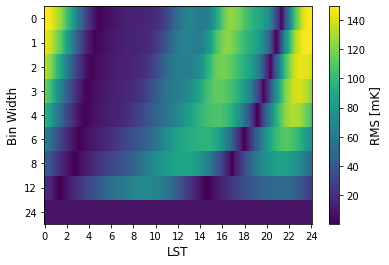

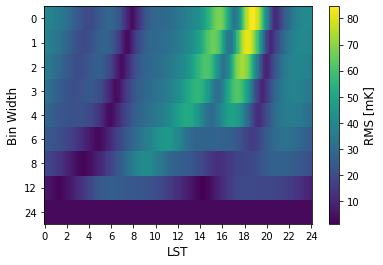

In [19]:
plt.figure()
plt.xlabel("LST")
plt.ylabel("Bin Width")
xt = np.arange(0, 260, 20)
xl = [str(t//10) for t in xt]
plt.xticks(xt, xl)
yt = [0, 1, 2, 3, 4, 5, 6, 7, 8]
yl = [0, 1, 2, 3, 4, 6, 8, 12, 24]
plt.yticks(yt, yl)
plt.imshow(rms_bin_large, aspect="auto", interpolation="none")
plt.colorbar(label="RMS [mK]")
#plt.clim()
plt.grid(which="minor")

plt.figure()
plt.xlabel("LST")
plt.ylabel("Bin Width")
plt.xticks(xt, xl)
plt.yticks(yt, yl)
plt.imshow(rms_bin_small, aspect="auto", interpolation="none")
plt.colorbar(label="RMS [mK]")
#plt.clim()
plt.grid(which="minor")

plt.figure()
plt.xlabel("LST")
plt.ylabel("Bin Width")
plt.xticks(xt, xl)
plt.yticks(yt, yl)
plt.imshow(rms_bin_small_gp, aspect="auto", interpolation="none")
plt.colorbar(label="RMS [mK]")
#plt.clim()
plt.grid(which="minor")

In [20]:
# compute avg
bin_width = 12
t_avg = np.empty_like(t_large)
for i in range(t_large.shape[1]):
    t_avg[:, i] = a.sliding_average(t_large[:, i], bin_width)

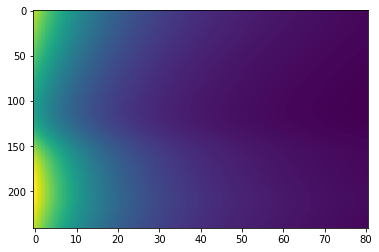

In [23]:
plt.imshow(t_avg, aspect="auto")